In [93]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import datetime
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import seaborn as sns
import numpy as np


In [94]:
df = pd.read_parquet('dataforanalysing.parquet')

In [95]:
df.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
PULocationID                      int64
DOLocationID                      int64
pickup_date              datetime64[ns]
pickup_time                      object
dropoff_date                     object
dropoff_time                     object
pickup_month                     object
dropoff_month                  category
holiday                            bool
week                              int32
day_type                         object
dropoff_timeslots                object
pickup_timeslots                 object
season                           object
dtype: object

In [96]:
# Calculate the count of pickups per location
pickup_counts = df['PULocationID'].value_counts()

# Calculate the count of drop-offs per location
dropoff_counts = df['DOLocationID'].value_counts()

# Combine the pickup and drop-off counts into a single DataFrame
location_counts = pd.concat([pickup_counts, dropoff_counts], axis=1, keys=['Pickup Count', 'Drop-off Count'])

# Calculate the total count by adding the pickup and drop-off counts
location_counts['Total Count'] = location_counts['Pickup Count'] + location_counts['Drop-off Count']

# Sort the locations based on the total count in descending order
sorted_locations = location_counts['Total Count'].sort_values(ascending=False)

# Print the ranked list of locations and their total counts
for i, (location, count) in enumerate(sorted_locations.items(), 1):
    print(f'{i}. Location ID: {location}, Total Count: {count}')


1. Location ID: 237, Total Count: 3366291.0
2. Location ID: 236, Total Count: 3233169.0
3. Location ID: 161, Total Count: 2915380.0
4. Location ID: 142, Total Count: 2293174.0
5. Location ID: 230, Total Count: 2292106.0
6. Location ID: 170, Total Count: 2289886.0
7. Location ID: 162, Total Count: 2267581.0
8. Location ID: 48, Total Count: 2165972.0
9. Location ID: 239, Total Count: 2126649.0
10. Location ID: 186, Total Count: 2116118.0
11. Location ID: 141, Total Count: 2019565.0
12. Location ID: 163, Total Count: 1997781.0
13. Location ID: 68, Total Count: 1863998.0
14. Location ID: 234, Total Count: 1862266.0
15. Location ID: 79, Total Count: 1753365.0
16. Location ID: 238, Total Count: 1659391.0
17. Location ID: 107, Total Count: 1635510.0
18. Location ID: 164, Total Count: 1611915.0
19. Location ID: 229, Total Count: 1611045.0
20. Location ID: 263, Total Count: 1609193.0
21. Location ID: 140, Total Count: 1539246.0
22. Location ID: 249, Total Count: 1410363.0
23. Location ID: 132, 

In [97]:
# Calculate the count of trips for each combination of pickup and drop-off location IDs
trip_counts = df.groupby(['PULocationID', 'DOLocationID']).size()

# Sort the locations based on the trip counts in descending order
sorted_locations = trip_counts.sort_values(ascending=False)

# Print the ranked list of locations and their trip counts
for i, (locations, count) in enumerate(sorted_locations.items(), 1):
    pickup_location, dropoff_location = locations
    print(f'{i}. Pickup Location ID: {pickup_location}, Drop-off Location ID: {dropoff_location}, Total Trips: {count}')


1. Pickup Location ID: 237, Drop-off Location ID: 236, Total Trips: 253200
2. Pickup Location ID: 236, Drop-off Location ID: 237, Total Trips: 214262
3. Pickup Location ID: 237, Drop-off Location ID: 237, Total Trips: 165037
4. Pickup Location ID: 236, Drop-off Location ID: 236, Total Trips: 156929
5. Pickup Location ID: 237, Drop-off Location ID: 161, Total Trips: 111173
6. Pickup Location ID: 161, Drop-off Location ID: 237, Total Trips: 101234
7. Pickup Location ID: 142, Drop-off Location ID: 239, Total Trips: 96282
8. Pickup Location ID: 239, Drop-off Location ID: 142, Total Trips: 94556
9. Pickup Location ID: 239, Drop-off Location ID: 238, Total Trips: 91492
10. Pickup Location ID: 161, Drop-off Location ID: 236, Total Trips: 90021
11. Pickup Location ID: 141, Drop-off Location ID: 236, Total Trips: 88997
12. Pickup Location ID: 237, Drop-off Location ID: 162, Total Trips: 87109
13. Pickup Location ID: 236, Drop-off Location ID: 161, Total Trips: 85083
14. Pickup Location ID: 132,

In [98]:

# Calculate the count of trips for each combination of pickup and drop-off location IDs
trip_counts = df.groupby(['PULocationID', 'DOLocationID']).size()

# Sort the locations based on the trip counts in descending order
sorted_locations = trip_counts.sort_values(ascending=False)

# Reset the index to convert the multi-index into columns
sorted_locations = sorted_locations.reset_index()

# Create a DataFrame with the ranked list of locations and their trip counts
ranked_locations_df = pd.DataFrame({
    'Pickup Location ID': sorted_locations['PULocationID'],
    'Drop-off Location ID': sorted_locations['DOLocationID'],
    'Total Trips': sorted_locations[0]
})

# Save the DataFrame to an Excel file
ranked_locations_df.to_excel('trippopularity.xlsx', index=False)

# Print the ranked list of pickup locations and their trip counts
# for i, (pickup_location, count) in enumerate(sorted_pickup_locations.items(), 1):
#     print(f'{i}. Pickup Location ID: {pickup_location}, Total Trips: {count}')


In [99]:
# Calculate the count of trips for each pickup location ID
pickup_counts = df['PULocationID'].value_counts()

# Sort the pickup locations based on the trip counts in descending order
sorted_pickup_locations = pickup_counts.sort_values(ascending=False)

# Create a DataFrame with the ranked list of pickup locations and their trip counts
ranked_locations_df = pd.DataFrame({'Pickup Location ID': sorted_pickup_locations.index, 'Total Trips': sorted_pickup_locations.values})

# Save the DataFrame to an Excel file
ranked_locations_df.to_excel('ranked_locations.xlsx', index=False)

In [100]:
# Convert columns to datetime if needed
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])

# Extract pickup month
df['pickup_month'] = df['pickup_date'].dt.month

#  Extract dropoff month
df['dropoff_month'] = df['dropoff_date'].dt.month

#  Filter data for holidays
holidays_df = df[df['holiday']]

#  Count holidays by pickup month
pickup_holidays_by_month = holidays_df.groupby('pickup_month').size()

# Count holidays by dropoff month
dropoff_holidays_by_month = holidays_df.groupby('dropoff_month').size()

print("Holidays by pickup month:")
print(pickup_holidays_by_month)

print("\nHolidays by dropoff month:")
print(dropoff_holidays_by_month)

Holidays by pickup month:
pickup_month
1      56864
2      77592
5      73400
6      90322
7      55937
9      69909
10     84700
11    166729
12     59448
dtype: int64

Holidays by dropoff month:
dropoff_month
1      56864
2      77592
5      73400
6      90322
7      55937
9      69909
10     84700
11    166729
12     59448
dtype: int64


In [101]:
# Calculate the total number of holiday trips
total_holiday_trips = pickup_holidays_by_month.sum()

# Calculate the percentage of holiday trips by pickup month
percentage_pickup_holidays = (pickup_holidays_by_month / total_holiday_trips) * 100

# Calculate the percentage of holiday trips by dropoff month
percentage_dropoff_holidays = (dropoff_holidays_by_month / total_holiday_trips) * 100

print("Percentage of holiday trips by pickup month:")
print(percentage_pickup_holidays)

print("\nPercentage of holiday trips by dropoff month:")
print(percentage_dropoff_holidays)


Percentage of holiday trips by pickup month:
pickup_month
1      7.737641
2     10.558157
5      9.987740
6     12.290363
7      7.611501
9      9.512710
10    11.525362
11    22.687274
12     8.089253
dtype: float64

Percentage of holiday trips by dropoff month:
dropoff_month
1      7.737641
2     10.558157
5      9.987740
6     12.290363
7      7.611501
9      9.512710
10    11.525362
11    22.687274
12     8.089253
dtype: float64


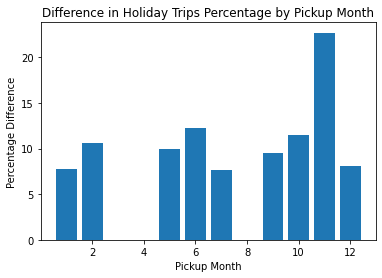

In [102]:
# Plotting the difference
plt.bar(percentage_pickup_holidays.index,percentage_pickup_holidays)
plt.xlabel("Pickup Month")
plt.ylabel("Percentage Difference")
plt.title("Difference in Holiday Trips Percentage by Pickup Month")
plt.show()

In [103]:
# Compare the two lists 
are_equal = pickup_holidays_by_month.equals(dropoff_holidays_by_month)
# Print the result
if are_equal:
    print("The counts for holidays by pickup month and dropoff month are equal.")
else:
    print("The counts for holidays by pickup month and dropoff month are not equal.")

The counts for holidays by pickup month and dropoff month are equal.


In [104]:
#  Calculate the total number of rows in the DataFrame
total_rows = len(df)

#  Calculate the number of holiday trips
holiday_trips = len(holidays_df)

#  Calculate the percentage of holiday trips
percentage_holidays = (holiday_trips / total_rows) * 100

# Print the results
print(f"Percentage of trips that are holidays: {percentage_holidays:.2f}%")
print(f"Total rows in the DataFrame: {total_rows}")

Percentage of trips that are holidays: 2.05%
Total rows in the DataFrame: 35826586


In [105]:
#  Count trips by season
trips_by_season = df.groupby('season').size()

#  Calculate the percentage of trips by season
percentage_by_season = (trips_by_season / total_rows) * 100

print("\nTrips by season:")
print(trips_by_season)

print("\nPercentage of trips by season:")
print(percentage_by_season)


Trips by season:
season
autumn    9084987
spring    9829450
summer    8894033
winter    8018116
dtype: int64

Percentage of trips by season:
season
autumn    25.358227
spring    27.436189
summer    24.825232
winter    22.380352
dtype: float64


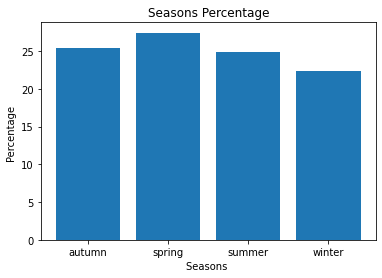

In [106]:
# Plotting the difference
plt.bar(percentage_by_season.index,percentage_by_season)
plt.xlabel("Seasons ")
plt.ylabel("Percentage ")
plt.title("Seasons Percentage")
plt.show()

In [107]:
#  Count trips by day type
trips_by_day_type = df.groupby('day_type').size()

# Calculate the percentage of trips by day type
percentage_by_day_type = (trips_by_day_type / total_rows) * 100

print("\nTrips by day type:")
print(trips_by_day_type)

print("\nPercentage of trips by day type:")
print(percentage_by_day_type)


Trips by day type:
day_type
holiday      734901
weekend     9516187
workday    25575498
dtype: int64

Percentage of trips by day type:
day_type
holiday     2.051273
weekend    26.561802
workday    71.386925
dtype: float64


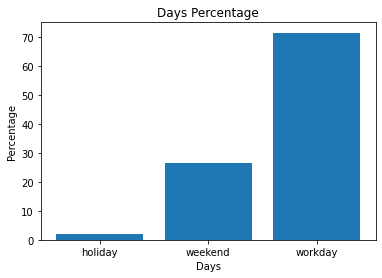

In [108]:
# Plotting the difference
plt.bar(percentage_by_day_type.index,percentage_by_day_type)
plt.xlabel("Days")
plt.ylabel("Percentage")
plt.title("Days Percentage")
plt.show()

In [109]:
#  Count trips by dropoff timeslots
trips_by_dropoff_timeslots = df.groupby('dropoff_timeslots').size()

#  Calculate the percentage of trips by dropoff timeslots
percentage_by_dropoff_timeslots = (trips_by_dropoff_timeslots / total_rows) * 100

#  Count trips by pickup timeslots
trips_by_pickup_timeslots = df.groupby('pickup_timeslots').size()

#  Calculate the percentage of trips by pickup timeslots
percentage_by_pickup_timeslots = (trips_by_pickup_timeslots / total_rows) * 100

print("\nTrips by dropoff timeslots:")
print(trips_by_dropoff_timeslots)

print("\nPercentage of trips by dropoff timeslots:")
print(percentage_by_dropoff_timeslots)


Trips by dropoff timeslots:
dropoff_timeslots
Afternoon     10661492
Evening       11437591
Late Night     6130392
Morning        7597111
dtype: int64

Percentage of trips by dropoff timeslots:
dropoff_timeslots
Afternoon     29.758604
Evening       31.924870
Late Night    17.111293
Morning       21.205233
dtype: float64


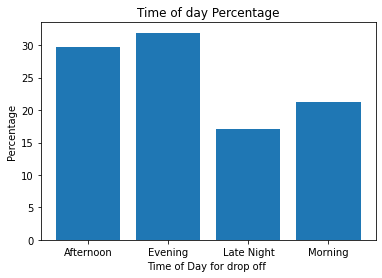

In [110]:
# Plotting the difference
plt.bar(percentage_by_dropoff_timeslots.index,percentage_by_dropoff_timeslots)
plt.xlabel("Time of Day for drop off ")
plt.ylabel("Percentage")
plt.title("Time of day Percentage")
plt.show()

In [111]:
print("\nTrips by pickup timeslots:")
print(trips_by_pickup_timeslots)

print("\nPercentage of trips by pickup timeslots:")
print(percentage_by_pickup_timeslots)


Trips by pickup timeslots:
pickup_timeslots
Afternoon     10810981
Evening       11203322
Late Night     5760478
Morning        8051805
dtype: int64

Percentage of trips by pickup timeslots:
pickup_timeslots
Afternoon     30.175862
Evening       31.270973
Late Night    16.078780
Morning       22.474385
dtype: float64


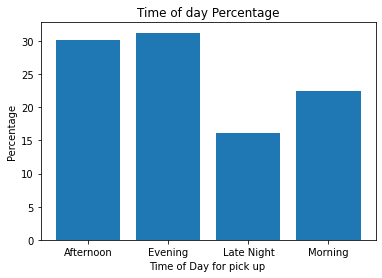

In [112]:
# Plotting the difference
plt.bar(percentage_by_pickup_timeslots.index,percentage_by_pickup_timeslots)
plt.xlabel("Time of Day for pick up ")
plt.ylabel("Percentage")
plt.title("Time of day Percentage")
plt.show()

In [113]:
# # Select the columns for correlation analysis
# columns = ['passenger_count', 'PULocationID', 'DOLocationID']

# # Create a subset of the DataFrame with the selected columns
# subset_df = df[columns]

# # Calculate the correlation matrix
# correlation_matrix = subset_df.corr()

# # Create a mask to display only the lower triangle of the correlation matrix
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# # Set up the figure and axes
# fig, ax = plt.subplots(figsize=(10, 8))

# # Create the heatmap
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8}, ax=ax)

# # Set the tick labels and rotation for x and y axes
# ax.set_xticklabels(columns, rotation=45, ha='right')
# ax.set_yticklabels(columns, rotation=0)

# # Add a title to the plot
# plt.title('Correlation Heatmap')

# # Show the plot
# plt.show()

/var/folders/6q/9wmlbvpj5nqfn_clctmzyck00000gn/T/ipykernel_1265/2249286929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['pickup_time'] = pd.to_datetime(winter_data['pickup_time'], format='%H:%M:%S').dt.hour
/var/folders/6q/9wmlbvpj5nqfn_clctmzyck00000gn/T/ipykernel_1265/2249286929.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_data['pickup_time'] = pd.to_datetime(spring_data['pickup_time'], format='%H:%M:%S').dt.hour
/var/folders/6q/9wmlbvpj5nqfn_clctmzyck00000gn/T/ipykernel_1

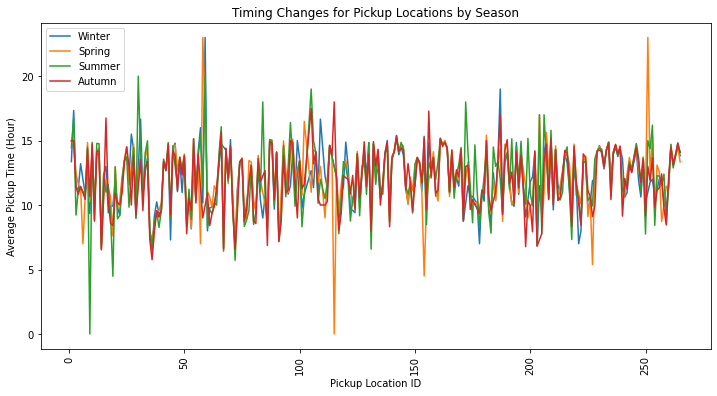

In [114]:
# Filter the DataFrame for each season
winter_data = df[df['season'] == 'winter']
spring_data = df[df['season'] == 'spring']
summer_data = df[df['season'] == 'summer']
autumn_data = df[df['season'] == 'autumn']

# Convert the pickup_time column to a string and then to a numerical representation
winter_data['pickup_time'] = pd.to_datetime(winter_data['pickup_time'], format='%H:%M:%S').dt.hour
spring_data['pickup_time'] = pd.to_datetime(spring_data['pickup_time'], format='%H:%M:%S').dt.hour
summer_data['pickup_time'] = pd.to_datetime(summer_data['pickup_time'], format='%H:%M:%S').dt.hour
autumn_data['pickup_time'] = pd.to_datetime(autumn_data['pickup_time'], format='%H:%M:%S').dt.hour

# Group the data by PULocationID and calculate the average pickup time for each location and season
winter_avg_pickup_time = winter_data.groupby('PULocationID')['pickup_time'].mean()
spring_avg_pickup_time = spring_data.groupby('PULocationID')['pickup_time'].mean()
summer_avg_pickup_time = summer_data.groupby('PULocationID')['pickup_time'].mean()
autumn_avg_pickup_time = autumn_data.groupby('PULocationID')['pickup_time'].mean()

# Plot the timing changes for pickup locations by season
plt.figure(figsize=(12, 6))
plt.plot(winter_avg_pickup_time.index, winter_avg_pickup_time, label='Winter')
plt.plot(spring_avg_pickup_time.index, spring_avg_pickup_time, label='Spring')
plt.plot(summer_avg_pickup_time.index, summer_avg_pickup_time, label='Summer')
plt.plot(autumn_avg_pickup_time.index, autumn_avg_pickup_time, label='Autumn')

plt.xlabel('Pickup Location ID')
plt.ylabel('Average Pickup Time (Hour)')
plt.title('Timing Changes for Pickup Locations by Season')
plt.legend()
plt.xticks(rotation=90)
plt.savefig('timing_changes_by_season.png')
plt.show()


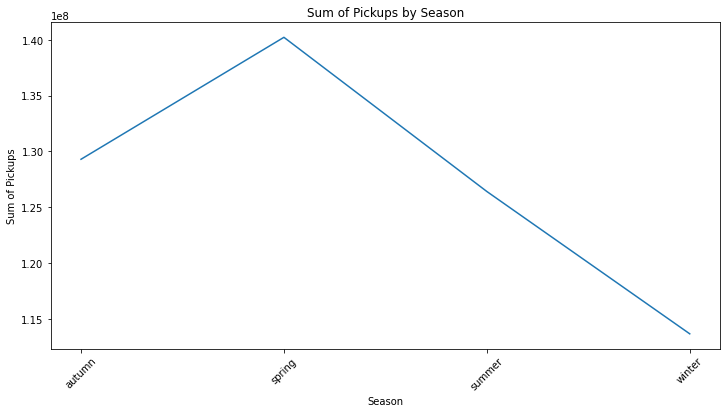

In [115]:
# Convert the pickup_time column to a string and then to a numerical representation
df['pickup_time'] = pd.to_datetime(df['pickup_time'], format='%H:%M:%S').dt.hour

# Group the data by season and calculate the sum of pickups for each season
pickup_sum_by_season = df.groupby('season')['pickup_time'].sum()

# Plot the sum of pickups by season as a line plot
plt.figure(figsize=(12, 6))
plt.plot(pickup_sum_by_season.index, pickup_sum_by_season)
plt.xlabel('Season')
plt.ylabel('Sum of Pickups')
plt.title('Sum of Pickups by Season')
plt.xticks(rotation=45)
plt.show()



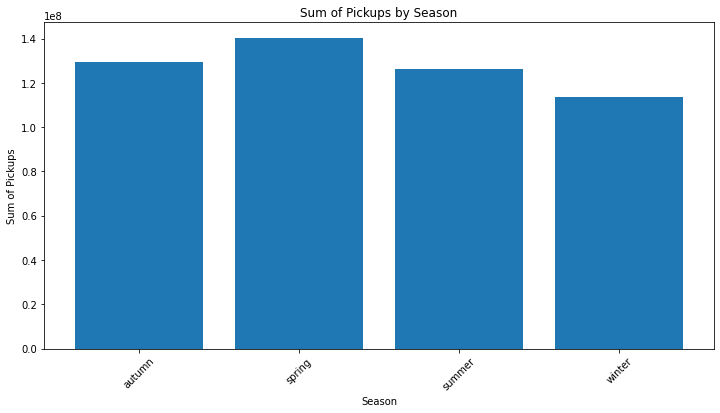

In [116]:
# Create a bar chart of the sum of pickups by season
plt.figure(figsize=(12, 6))
plt.bar(pickup_sum_by_season.index, pickup_sum_by_season)
plt.xlabel('Season')
plt.ylabel('Sum of Pickups')
plt.title('Sum of Pickups by Season')
plt.xticks(rotation=45)
plt.show()

In [117]:
pulocations_to_filter = [4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 103, 104, 105, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

grouped_df = df.groupby(['PULocationID', 'tpep_pickup_datetime']).size().reset_index(name='count')

# Filter the DataFrame based on PULocationID
df_filtered = grouped_df[grouped_df['PULocationID'].isin(pulocations_to_filter)]

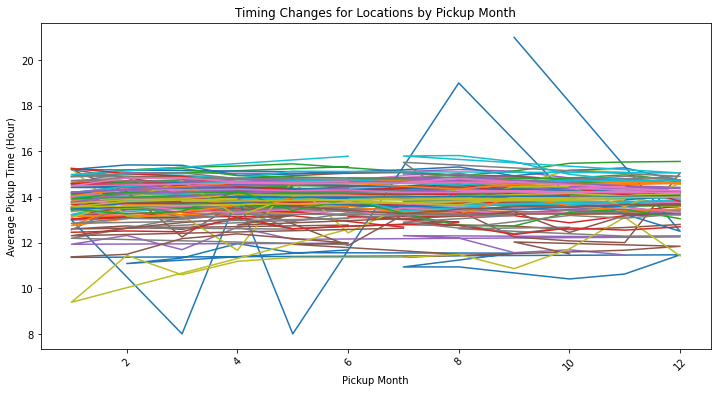

In [118]:
# Filter the DataFrame for the specified locations
filtered_data = df[df['PULocationID'].isin(pulocations_to_filter)]

# Group the data by PULocationID and pickup_month and calculate the average pickup time
avg_pickup_time_by_month = filtered_data.groupby(['PULocationID', 'pickup_month'])['pickup_time'].mean()

# Reset the index to convert the grouped data into a DataFrame
avg_pickup_time_by_month = avg_pickup_time_by_month.reset_index()

# Sort the DataFrame by PULocationID for better visualization
avg_pickup_time_by_month = avg_pickup_time_by_month.sort_values(by='PULocationID')

# Create a line plot for each location
plt.figure(figsize=(12, 6))
for location in pulocations_to_filter:
    location_data = avg_pickup_time_by_month[avg_pickup_time_by_month['PULocationID'] == location]
    plt.plot(location_data['pickup_month'], location_data['pickup_time'], label=f'Location {location}')

plt.xlabel('Pickup Month')
plt.ylabel('Average Pickup Time (Hour)')
plt.title('Timing Changes for Locations by Pickup Month')
plt.xticks(rotation=45)
plt.show()

This below will work when i have filtered it for manhattan 

In [119]:
# # Group the data by PULocationID and pickup_month and calculate the average pickup time
# avg_pickup_time_by_month = df.groupby(['PULocationID', 'pickup_month'])['pickup_time'].mean()

# # Reset the index to convert the grouped data into a DataFrame
# avg_pickup_time_by_month = avg_pickup_time_by_month.reset_index()

# # Sort the DataFrame by PULocationID for better visualization
# avg_pickup_time_by_month = avg_pickup_time_by_month.sort_values(by='PULocationID')

# # Create a line plot for each location
# plt.figure(figsize=(12, 6))
# for location in avg_pickup_time_by_month['PULocationID'].unique():
#     location_data = avg_pickup_time_by_month[avg_pickup_time_by_month['PULocationID'] == location]
#     plt.plot(location_data['pickup_month'], location_data['pickup_time'], label=f'Location {location}')

# plt.xlabel('Pickup Month')
# plt.ylabel('Average Pickup Time (Hour)')
# plt.title('Timing Changes for Locations by Pickup Month')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [120]:
df = pd.read_parquet('dataforanalysing.parquet')

In [121]:
# # Convert the pickup_time column to a string and then to a numerical representation
# pickup_hour = df['tpep_pickup_datetime'].dt.hour

# # Filter the data for the specified locations
# filtered_data = df[df['PULocationID'].isin(pulocations_to_filter)]

# # Group the filtered data by PULocationID and pickup_month and calculate the average pickup time
# avg_pickup_time_by_month = filtered_data.groupby(['PULocationID', 'pickup_month'])[pickup_hour].mean()

# # Reset the index to convert the grouped data into a DataFrame
# avg_pickup_time_by_month = avg_pickup_time_by_month.reset_index()

# # Sort the DataFrame by PULocationID for better visualization
# avg_pickup_time_by_month = avg_pickup_time_by_month.sort_values(by='PULocationID')

# # Create a line plot for each location
# plt.figure(figsize=(12, 6))
# for location in pulocations_to_filter:
#     location_data = avg_pickup_time_by_month[avg_pickup_time_by_month['PULocationID'] == location]
#     plt.plot(location_data['pickup_month'], location_data[pickup_hour], label=f'Location {location}')

# plt.xlabel('Pickup Month')
# plt.ylabel('Average Pickup Time (Hour)')
# plt.title('Timing Changes for Locations by Pickup Month')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

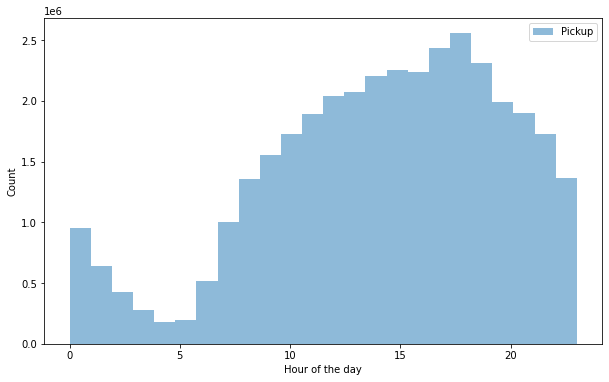

In [122]:
pickup_hour = df['tpep_pickup_datetime'].dt.hour

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.hist(pickup_hour, bins=24, alpha=0.5, label='Pickup')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

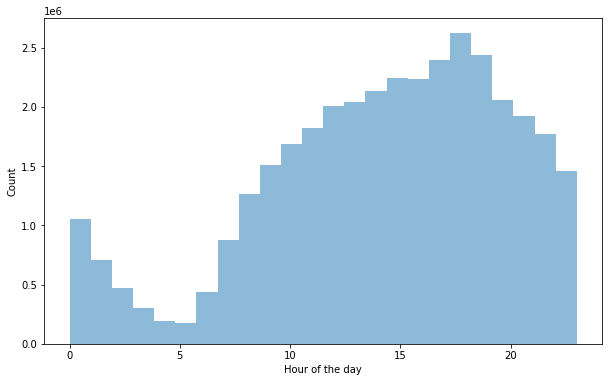

In [123]:
# Plot the distributions
dropoff_hour = df['tpep_dropoff_datetime'].dt.hour
plt.figure(figsize=(10, 6))
plt.hist(dropoff_hour, bins=24, alpha=0.5, label='Dropoff')
plt.xlabel('Hour of the day')
plt.ylabel('Count')
plt.show()

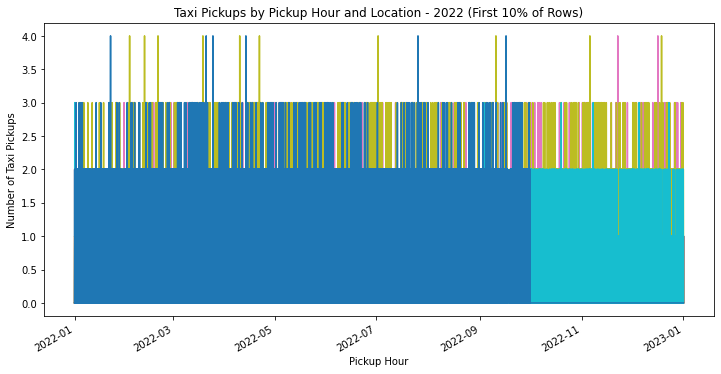

In [124]:
## ONLY 10 PER CENT 

pulocations_to_filter = [4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 103, 104, 105, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

grouped_df = df.groupby(['PULocationID', 'tpep_pickup_datetime']).size().reset_index(name='count')

# Filter the DataFrame based on PULocationID
df_filtered = grouped_df[grouped_df['PULocationID'].isin(pulocations_to_filter)]

# Filter the DataFrame for a specific year
year = 2022
df_year = df_filtered[df_filtered['tpep_pickup_datetime'].dt.year == year]

# Select the first 10% of rows
percentage = 0.1
df_sample = df_year.head(int(len(df_year) * percentage))

# Visualize the hotspots on a graph for the specific year
pivot_df = df_sample.pivot(index='tpep_pickup_datetime', columns='PULocationID', values='count').fillna(0)
pivot_df.plot(figsize=(12, 6), legend=None)
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Taxi Pickups')
plt.title(f'Taxi Pickups by Pickup Hour and Location - {year} (First 10% of Rows)')
plt.show()

In [125]:
# Filter the DataFrame for a specific year
year = 2022
df_year = df_filtered[df_filtered['tpep_pickup_datetime'].dt.year == year]

In [126]:
print("Original DataFrame Size:")
print(df_filtered.shape)


Original DataFrame Size:
(32900793, 3)


In [127]:
# Pivot the dataframe such that 'pickup_hour' and 'dropoff_hour' become columns, and count the number of occurrences of each
pickup_by_location = df.pivot_table(index='PULocationID', columns='pickup_time', aggfunc='size', fill_value=0)
dropoff_by_location = df.pivot_table(index='DOLocationID', columns='dropoff_time', aggfunc='size', fill_value=0)
sample_locations = [107, 238]  # replace with your actual location ids


In [128]:
# Convert time objects to numeric hour values
pickup_hours = [time.hour for time in pickup_by_location.columns]
dropoff_hours = [time.hour for time in dropoff_by_location.columns]


In [129]:
pulocations_to_filter = [4, 12, 13, 24, 41, 42, 43, 45, 48, 50, 68, 74, 75, 79, 87, 88, 90, 100, 105, 107, 113, 114, 116, 120, 125, 127, 128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161, 162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261, 262, 263]

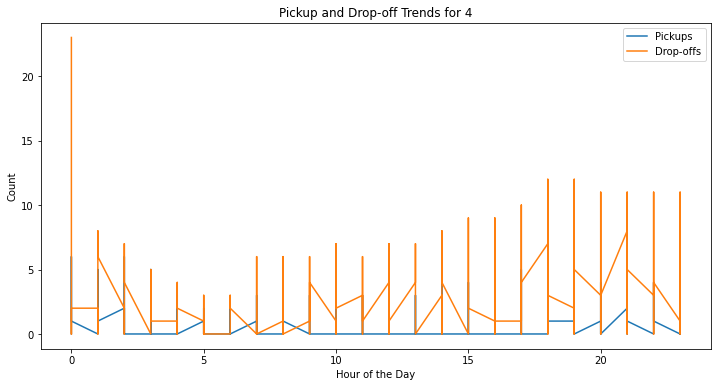

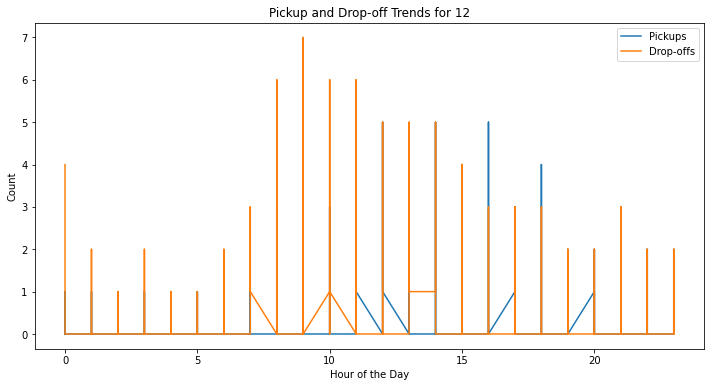

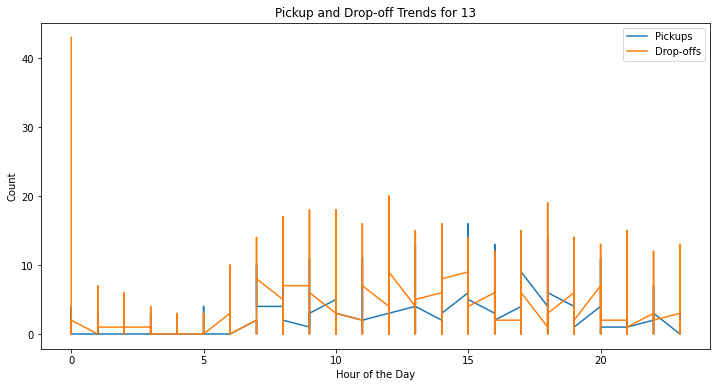

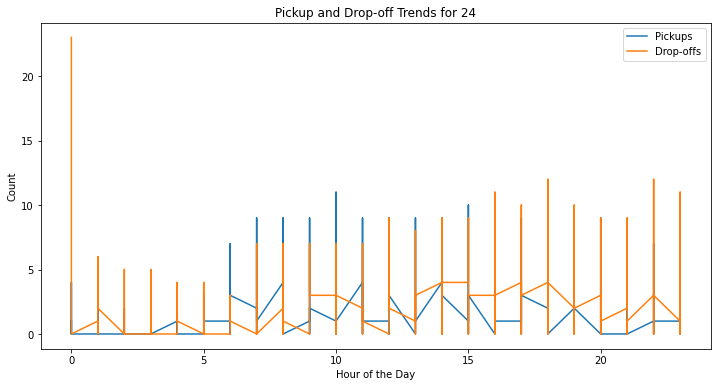

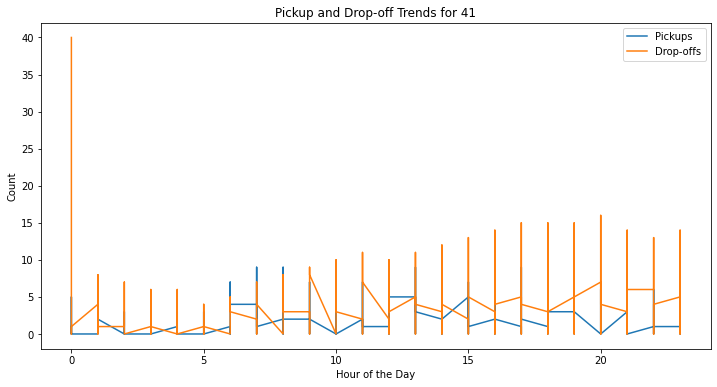

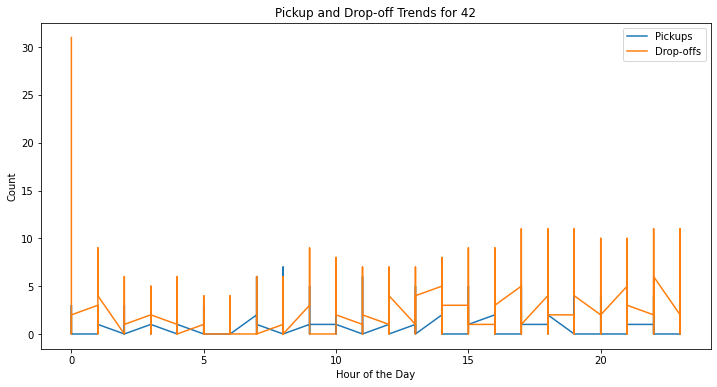

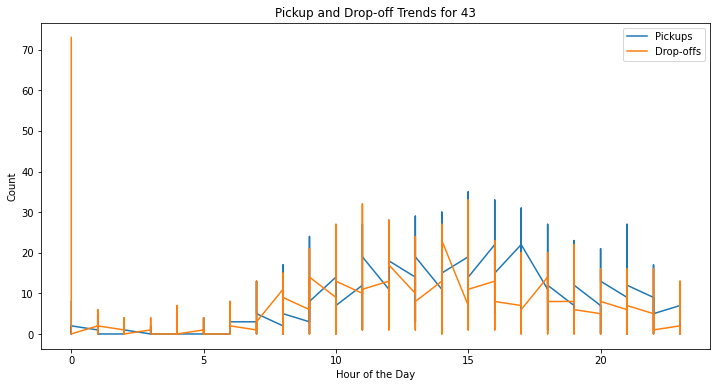

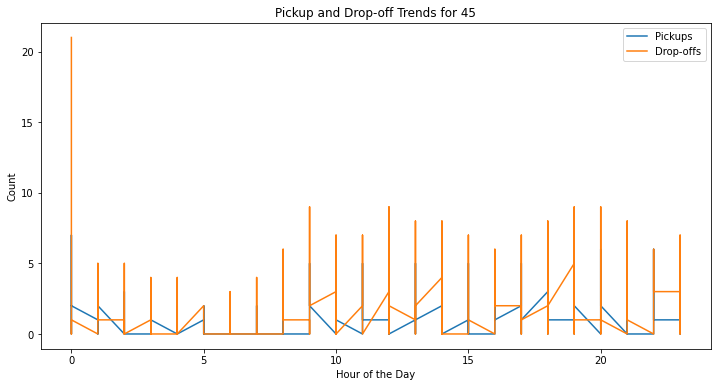

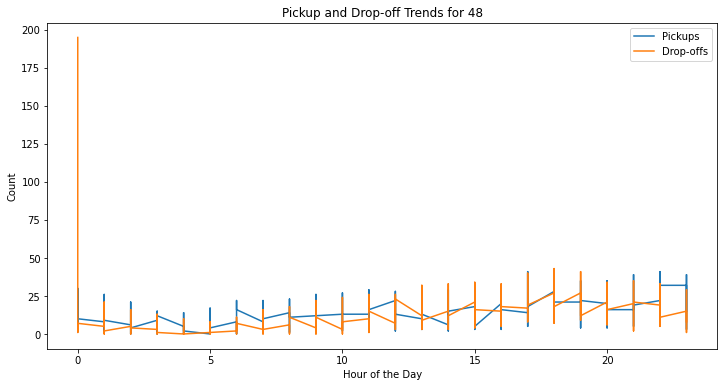

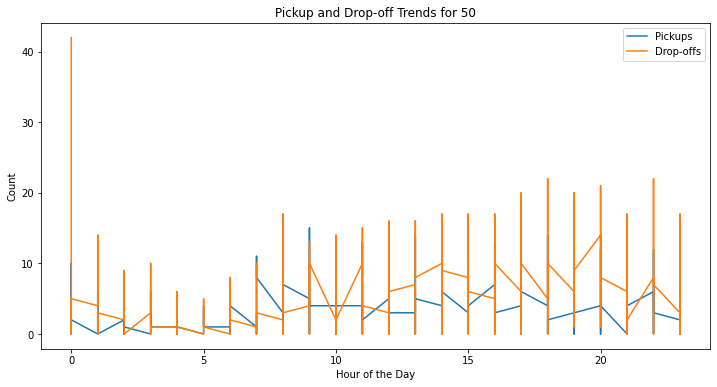

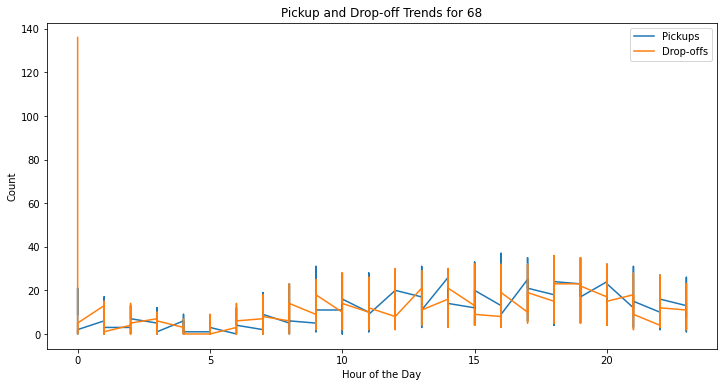

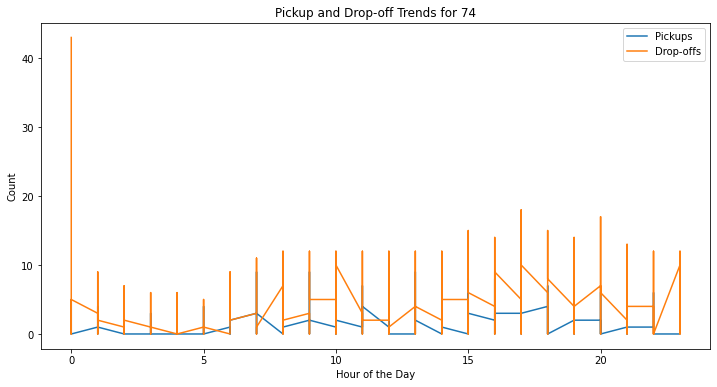

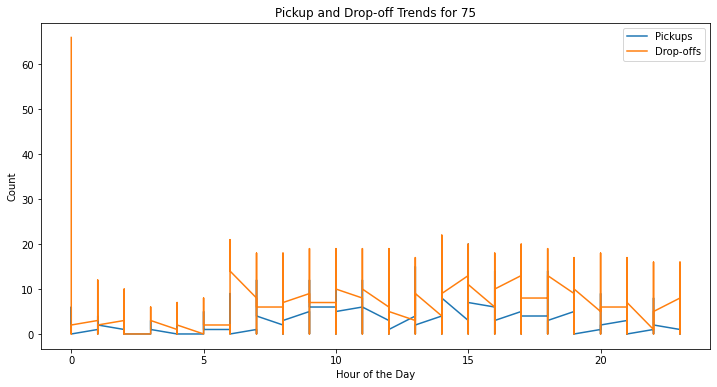

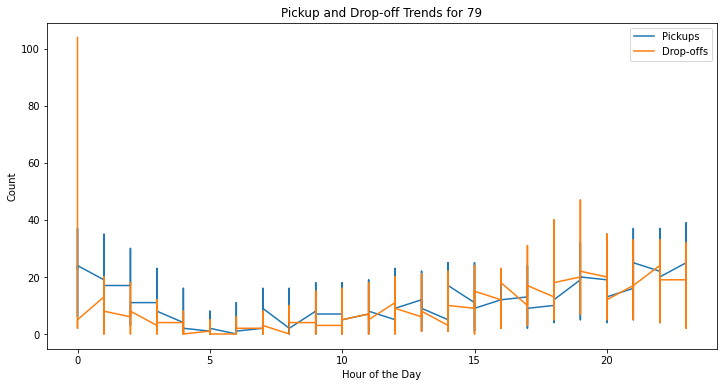

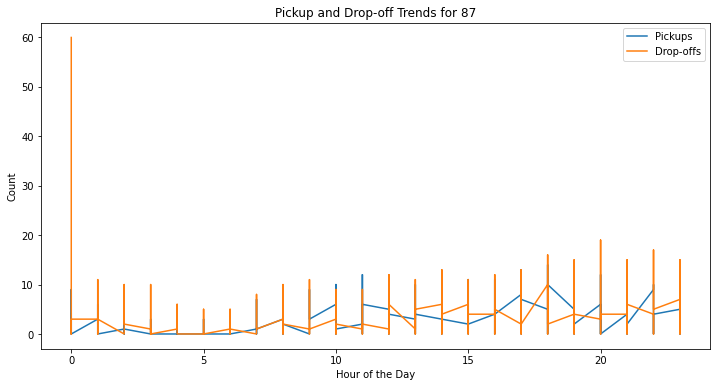

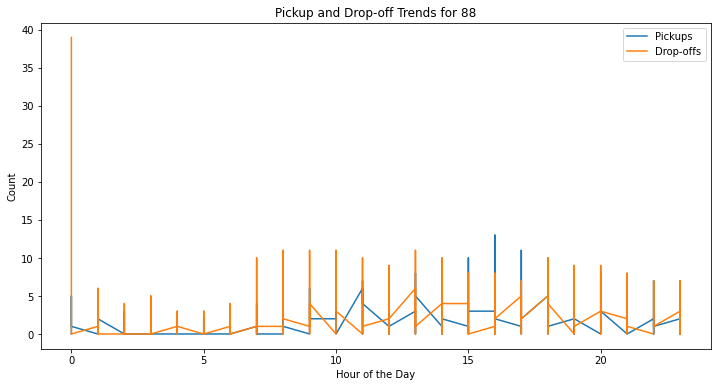

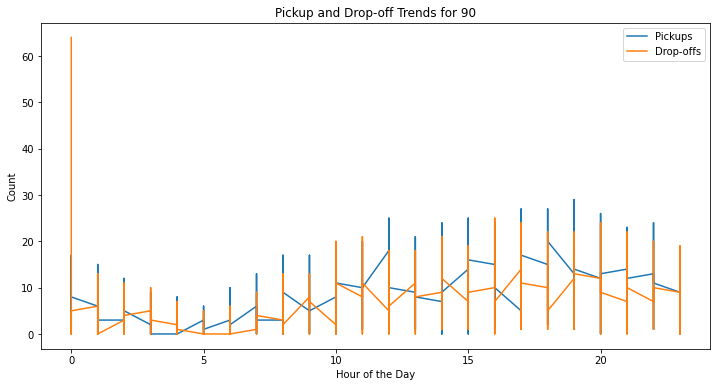

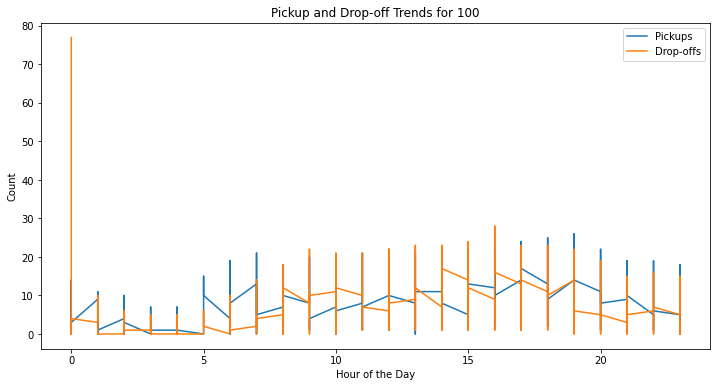

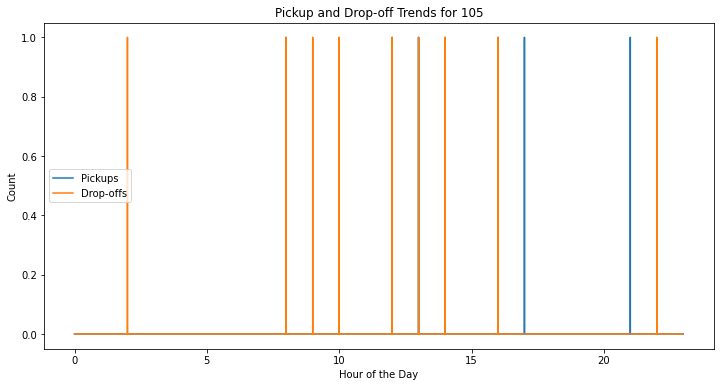

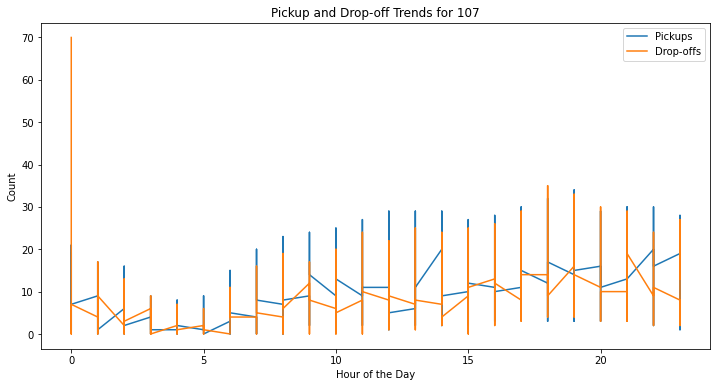

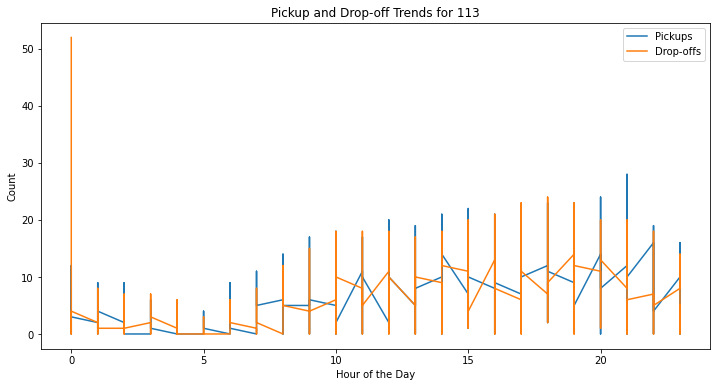

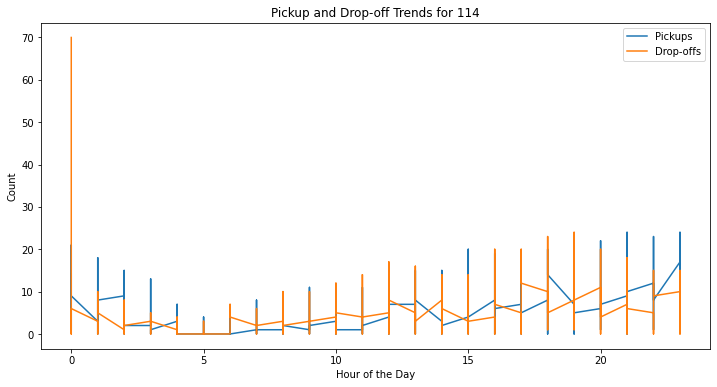

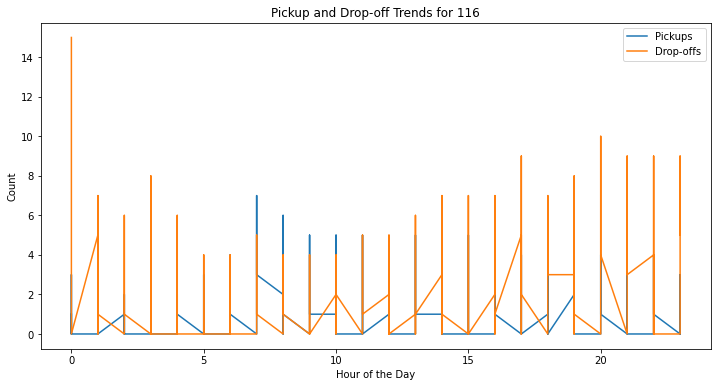

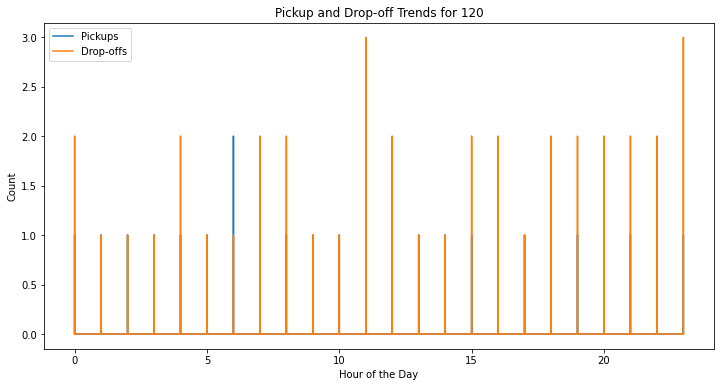

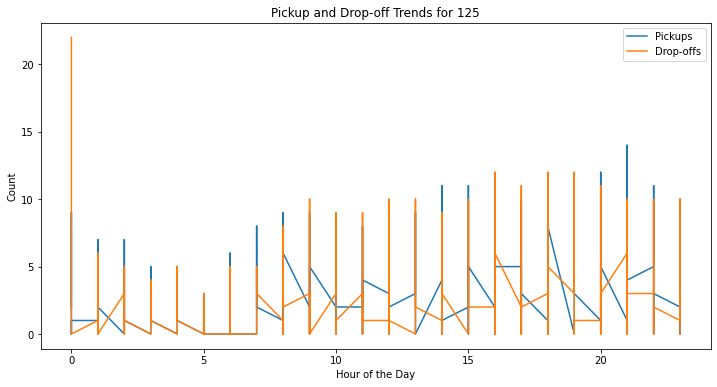

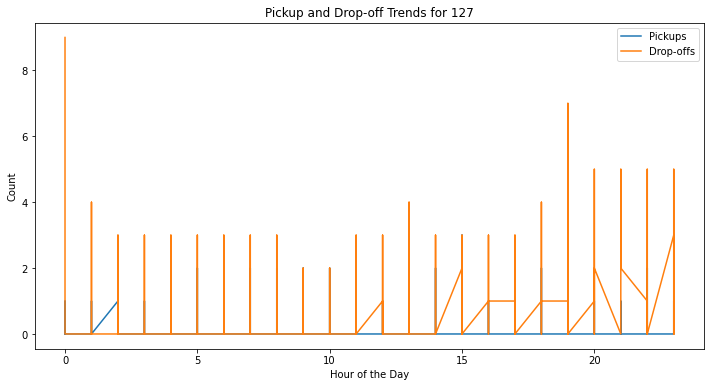

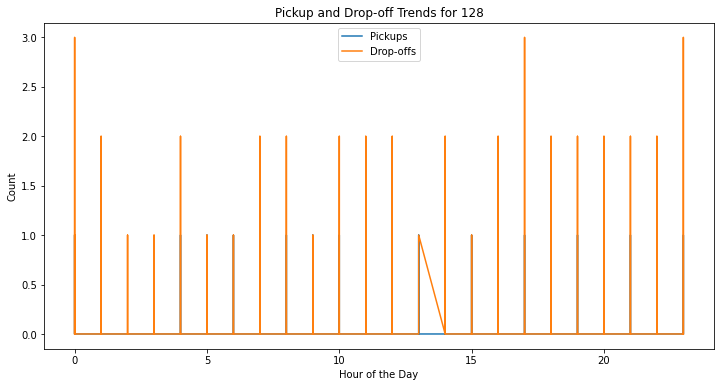

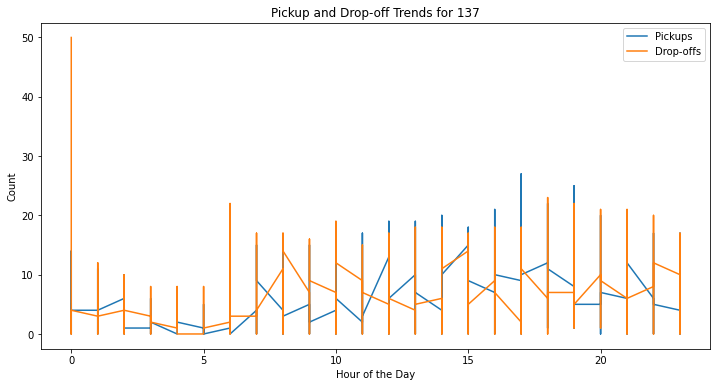

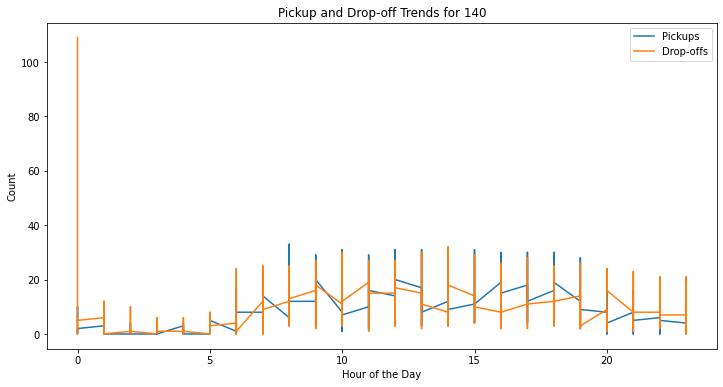

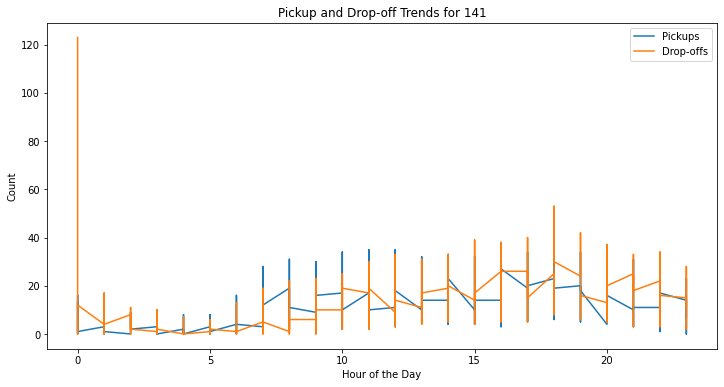

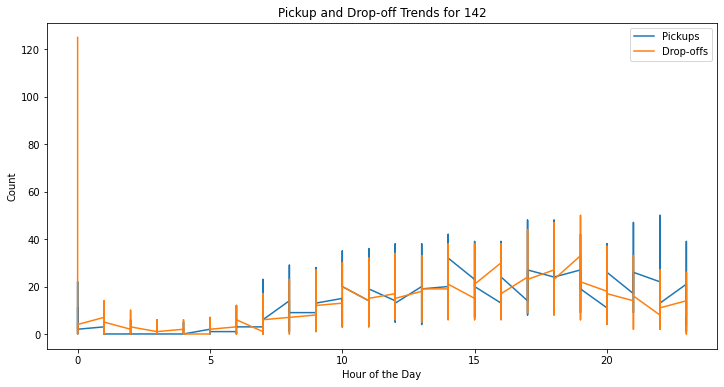

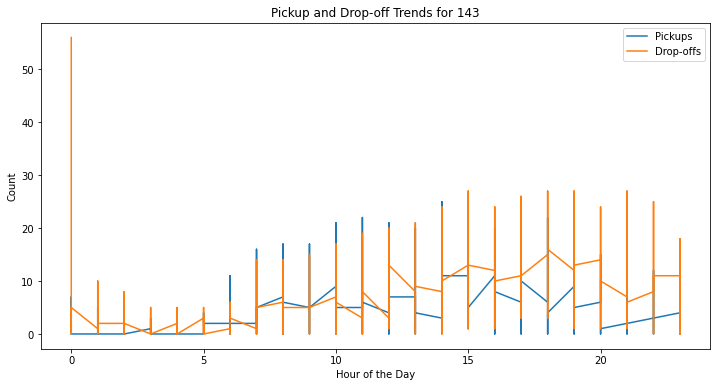

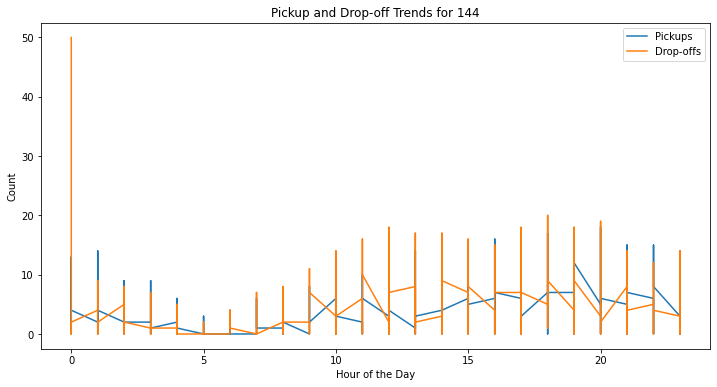

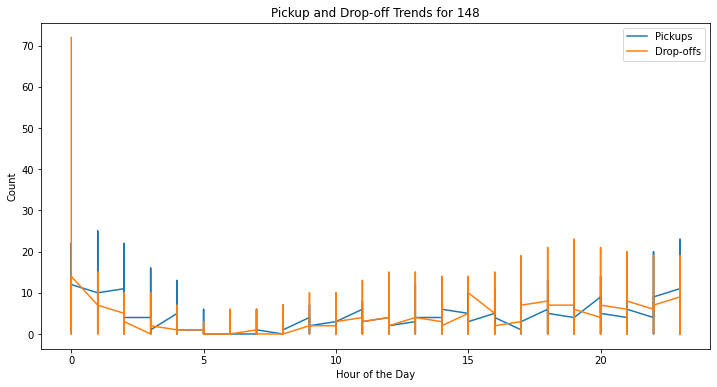

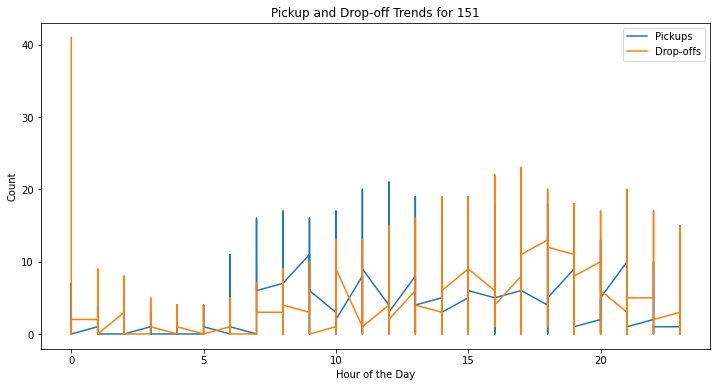

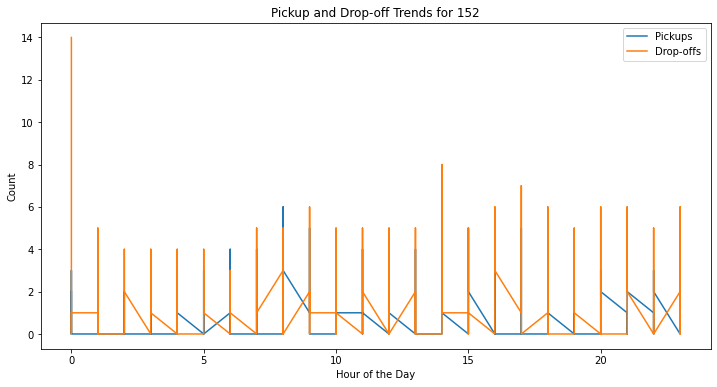

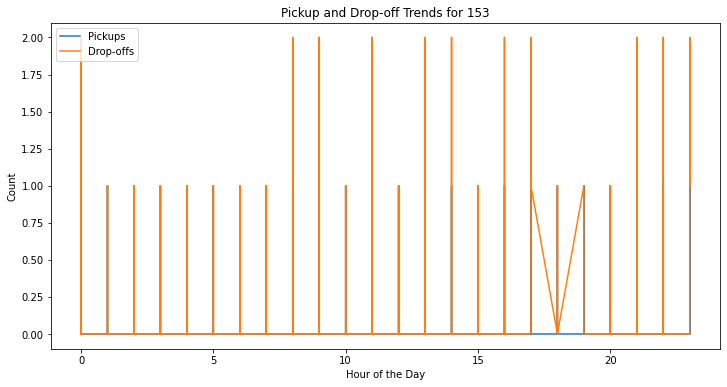

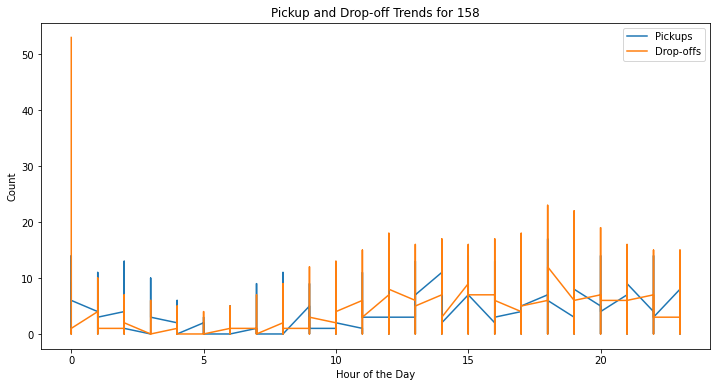

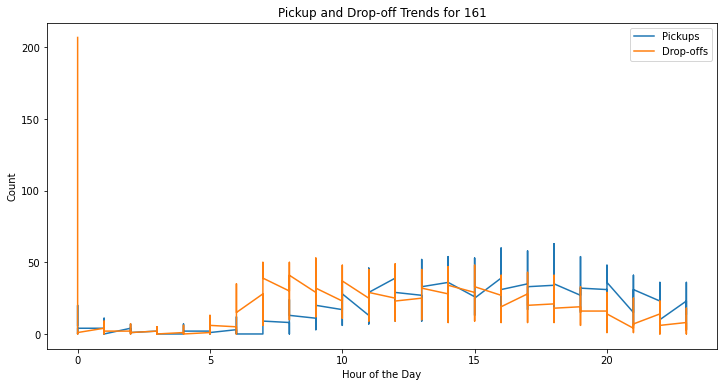

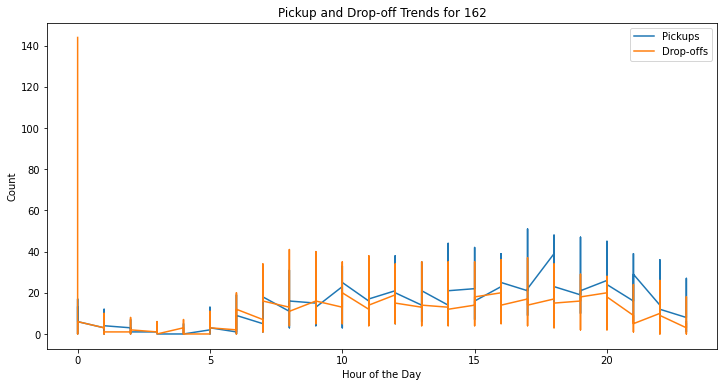

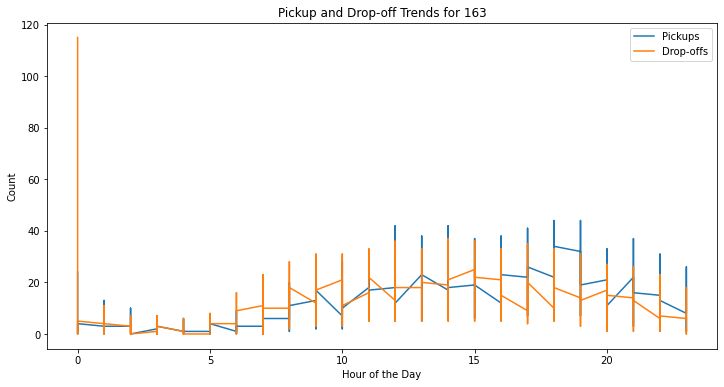

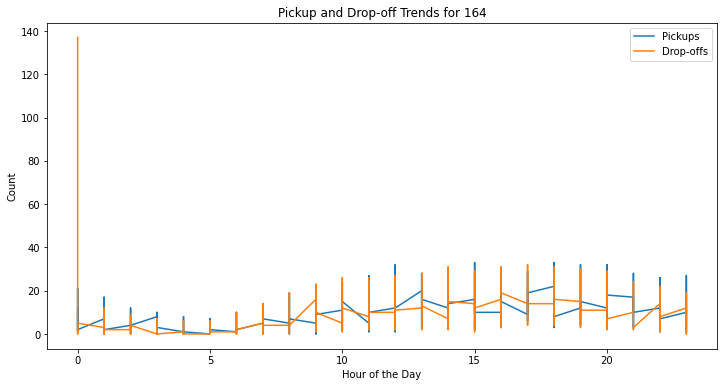

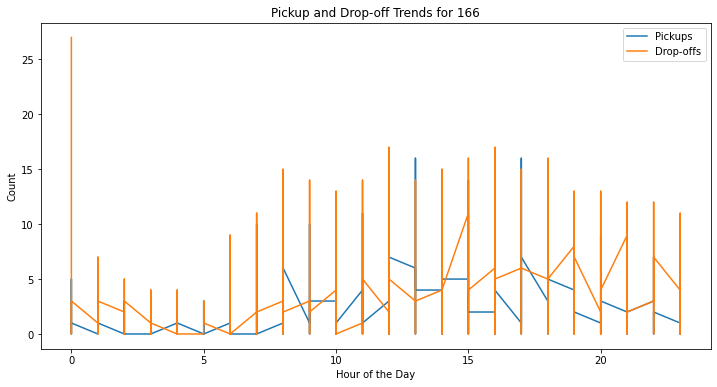

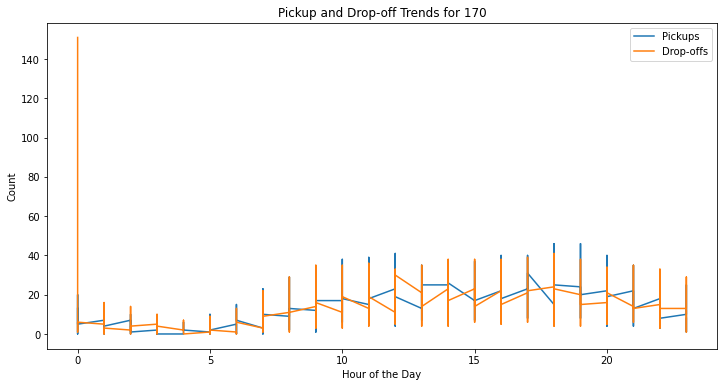

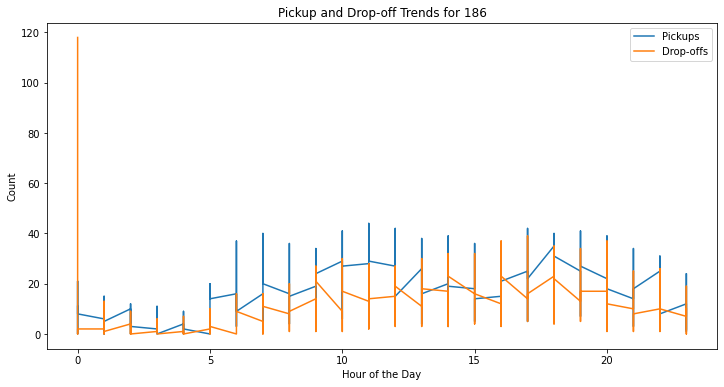

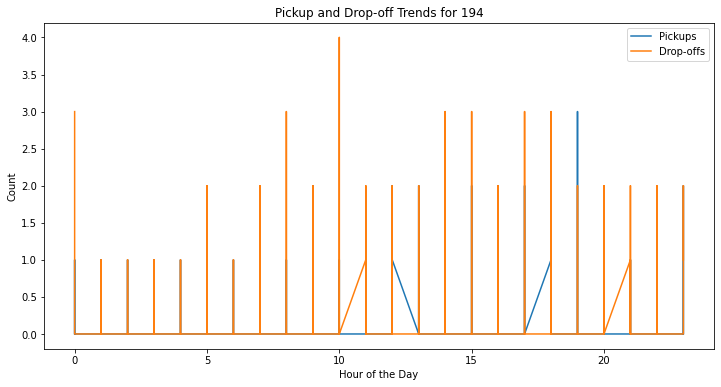

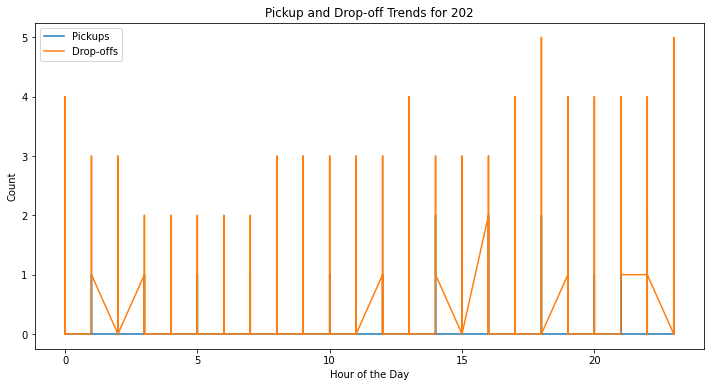

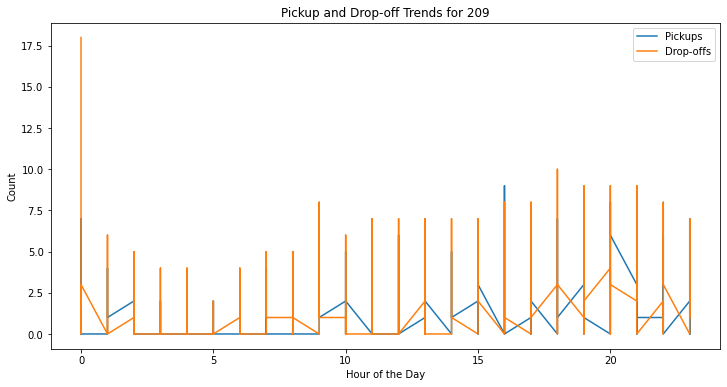

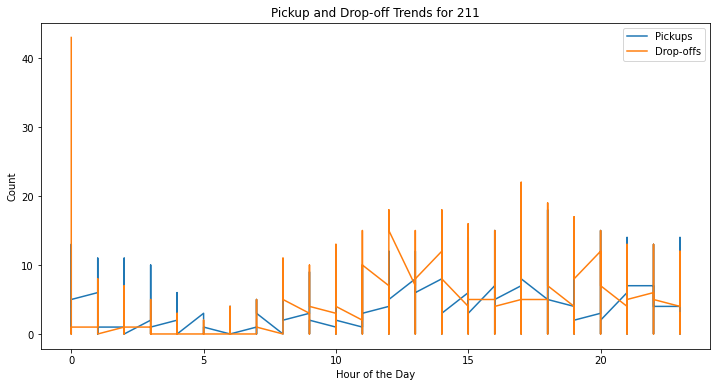

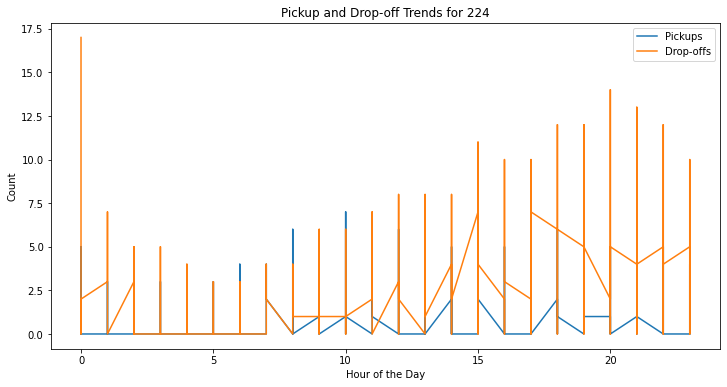

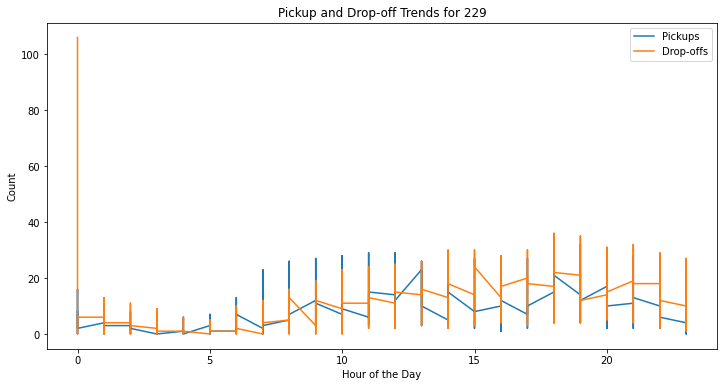

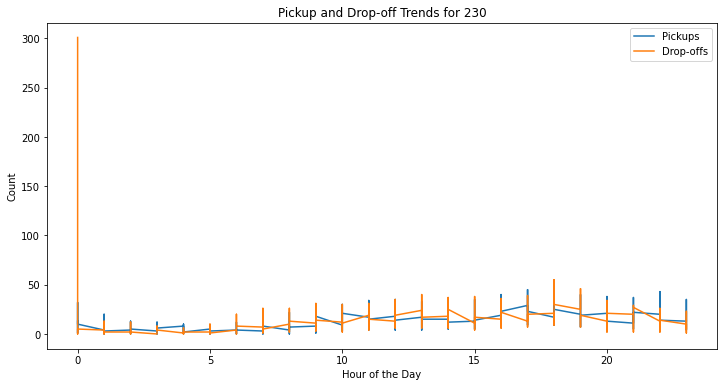

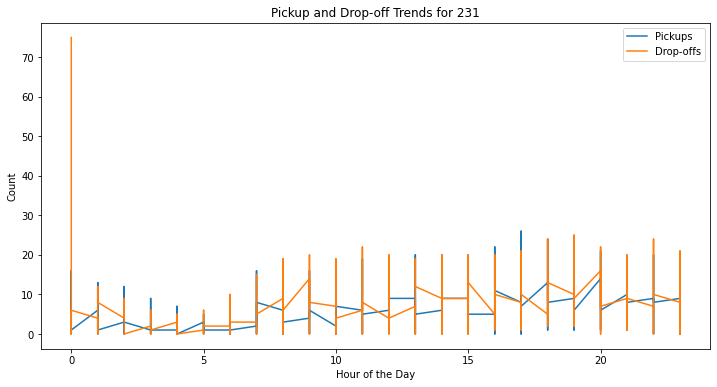

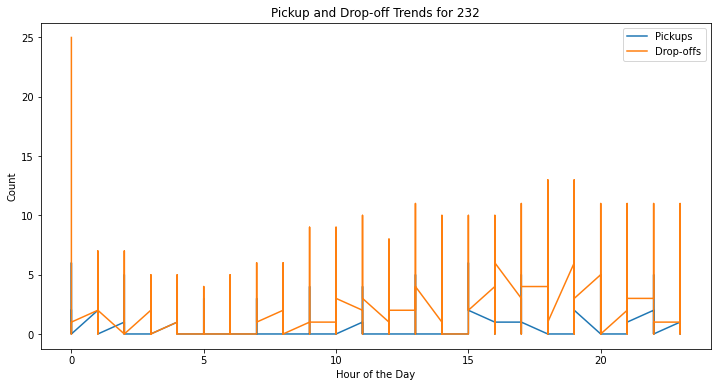

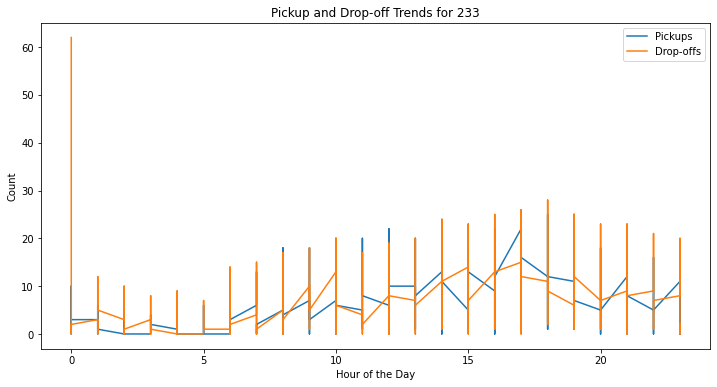

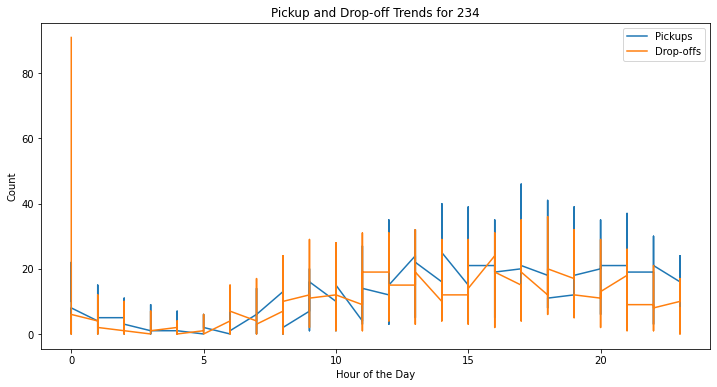

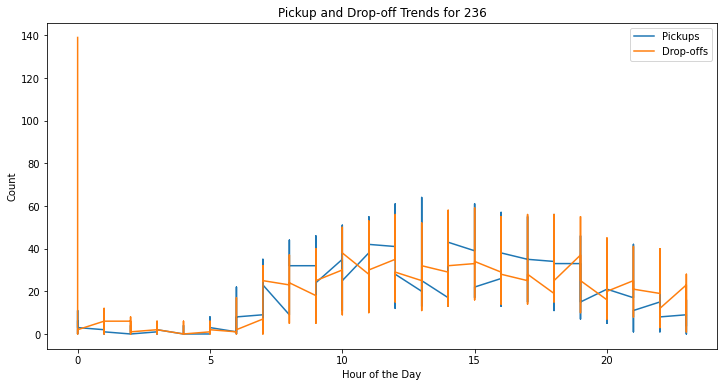

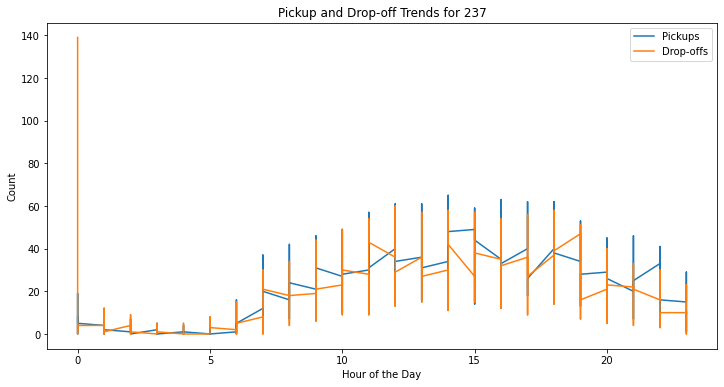

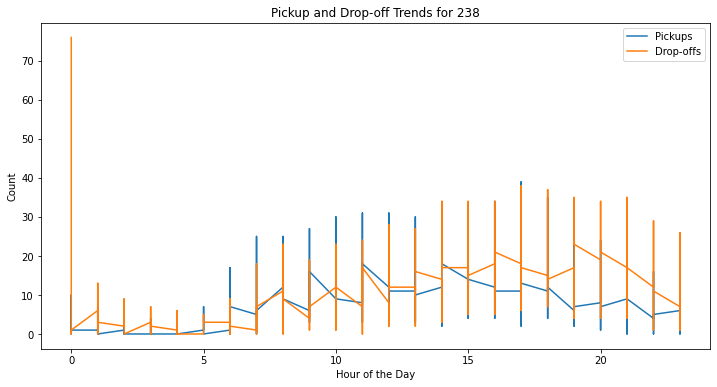

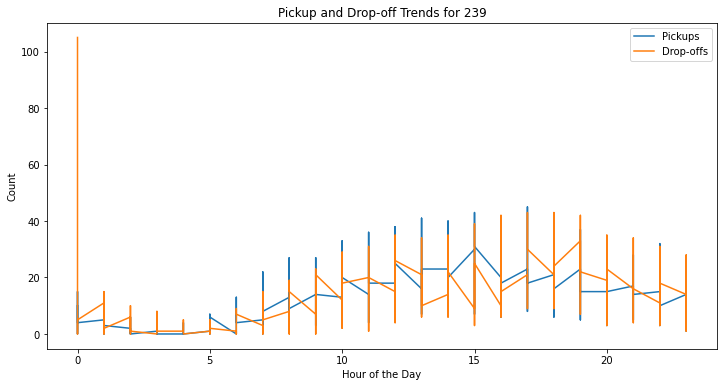

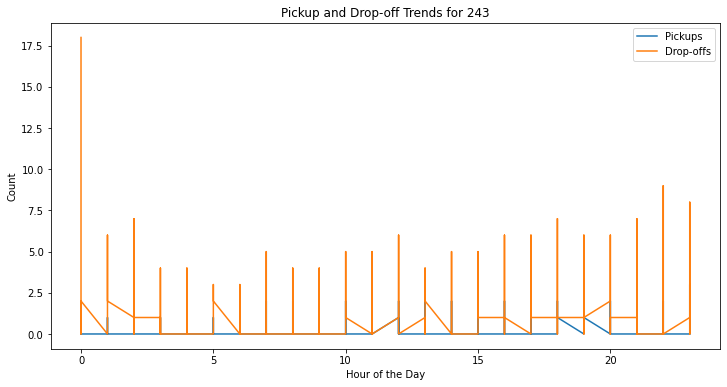

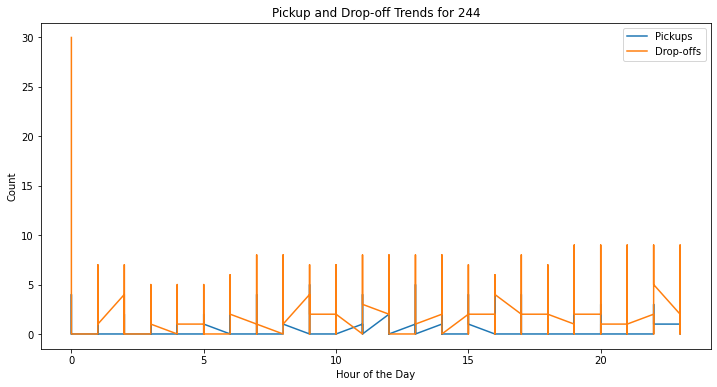

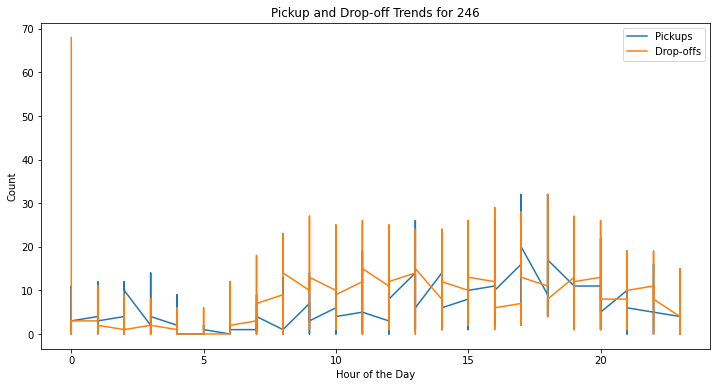

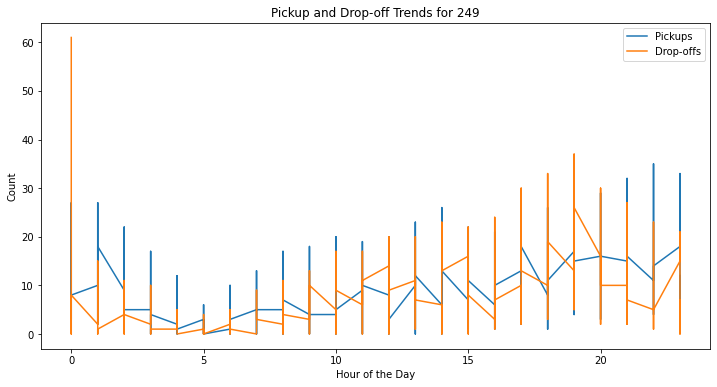

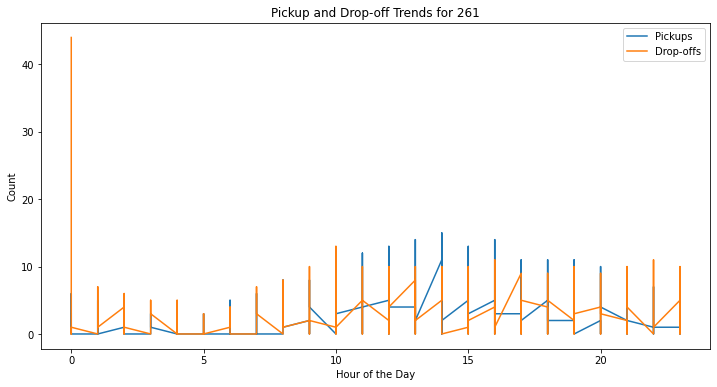

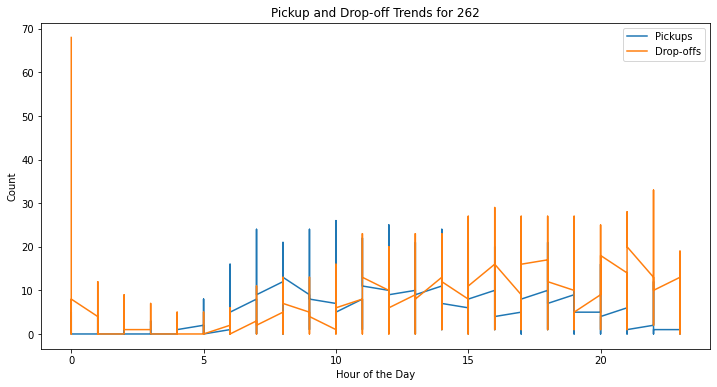

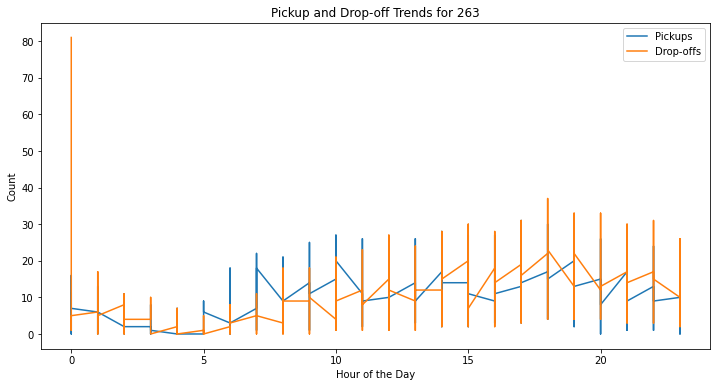

In [130]:
for location in pulocations_to_filter:
    plt.figure(figsize=(12, 6))
    plt.plot(pickup_hours, pickup_by_location.loc[location], label='Pickups')
    plt.plot(dropoff_hours, dropoff_by_location.loc[location], label='Drop-offs')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Count')
    plt.title(f'Pickup and Drop-off Trends for {location}')
    plt.savefig('Pickupanddropofftrends{location}.png')
    plt.legend()
    plt.show()

In [131]:
counts_per_location = []

for location in pulocations_to_filter:
    pickup_count = pickup_by_location.loc[location].sum()
    dropoff_count = dropoff_by_location.loc[location].sum()
    total_count = pickup_count + dropoff_count
    counts_per_location.append((location, total_count))

# Sort the locations based on the total count in descending order
counts_per_location.sort(key=lambda x: x[1], reverse=True)

# Print the ranked list of locations and their counts
for i, (location, count) in enumerate(counts_per_location, 1):
    print(f'{i}. {location}: {count} counts')

1. 237: 3366291 counts
2. 236: 3233169 counts
3. 161: 2915380 counts
4. 142: 2293174 counts
5. 230: 2292106 counts
6. 170: 2289886 counts
7. 162: 2267581 counts
8. 48: 2165972 counts
9. 239: 2126649 counts
10. 186: 2116118 counts
11. 141: 2019565 counts
12. 163: 1997781 counts
13. 68: 1863998 counts
14. 234: 1862266 counts
15. 79: 1753365 counts
16. 238: 1659391 counts
17. 107: 1635510 counts
18. 164: 1611915 counts
19. 229: 1611045 counts
20. 263: 1609193 counts
21. 140: 1539246 counts
22. 249: 1410363 counts
23. 246: 1247297 counts
24. 100: 1162955 counts
25. 90: 1155388 counts
26. 43: 1137094 counts
27. 262: 1081416 counts
28. 231: 1071939 counts
29. 233: 1069666 counts
30. 143: 1024175 counts
31. 137: 958190 counts
32. 113: 954718 counts
33. 114: 818209 counts
34. 148: 741486 counts
35. 75: 722304 counts
36. 151: 713389 counts
37. 50: 699844 counts
38. 158: 648089 counts
39. 144: 643156 counts
40. 211: 586998 counts
41. 13: 504061 counts
42. 87: 485351 counts
43. 166: 478977 counts

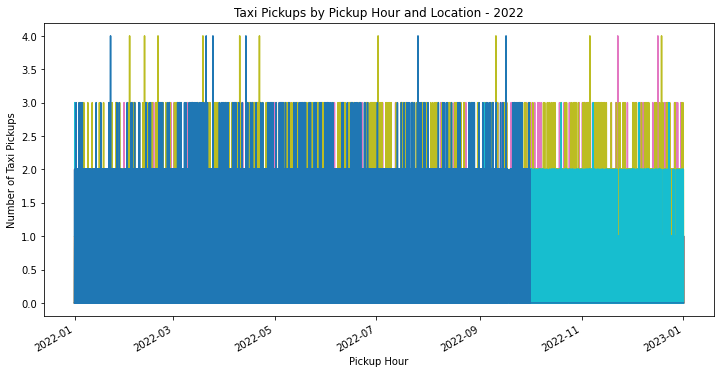

In [132]:
# Filter the DataFrame for a specific year
year = 2022
df = grouped_df[grouped_df['tpep_pickup_datetime'].dt.year == year]

# Filter the pivot_df for the specified PULocationID values
filtered_pivot_df = pivot_df[pivot_df.columns.intersection(pulocations_to_filter)]


# Visualize the hotspots on a graph for the specific year and filtered PULocationIDs
filtered_pivot_df.plot(figsize=(12, 6), legend=None)
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Taxi Pickups')
plt.title(f'Taxi Pickups by Pickup Hour and Location - {year}')
plt.show()

## DOES NOT SEEM TO BE WORKING I removed passengers thats why.

In [133]:
# # Calculate the total number of pickups per location
# pickup_counts = df.groupby('PULocationID')['passenger_count'].sum()

# # Sort the locations based on the pickup counts in descending order
# sorted_locations = pickup_counts.sort_values(ascending=False)

# # Print the ranked list of locations and their pickup counts
# for i, (location, count) in enumerate(sorted_locations.items(), 1):
#     print(f'{i}. Location ID: {location}, Total Pickups: {count}')


In [134]:
# Calculate the count of pickups per location
pickup_counts = df['PULocationID'].value_counts()

# Sort the locations based on the pickup counts in descending order
sorted_locations = pickup_counts.sort_values(ascending=False)

# Print the ranked list of locations and their pickup counts
for i, (location, count) in enumerate(sorted_locations.items(), 1):
    print(f'{i}. Location ID: {location}, Total Pickups: {count}')


1. Location ID: 237, Total Pickups: 1725936
2. Location ID: 236, Total Pickups: 1531749
3. Location ID: 161, Total Pickups: 1465879
4. Location ID: 186, Total Pickups: 1227766
5. Location ID: 162, Total Pickups: 1219335
6. Location ID: 142, Total Pickups: 1212960
7. Location ID: 230, Total Pickups: 1144505
8. Location ID: 170, Total Pickups: 1137589
9. Location ID: 48, Total Pickups: 1123346
10. Location ID: 163, Total Pickups: 1054812
11. Location ID: 239, Total Pickups: 1048796
12. Location ID: 132, Total Pickups: 980576
13. Location ID: 234, Total Pickups: 977780
14. Location ID: 141, Total Pickups: 970442
15. Location ID: 79, Total Pickups: 937644
16. Location ID: 68, Total Pickups: 927231
17. Location ID: 107, Total Pickups: 873592
18. Location ID: 164, Total Pickups: 828345
19. Location ID: 229, Total Pickups: 787551
20. Location ID: 263, Total Pickups: 783870
21. Location ID: 249, Total Pickups: 771365
22. Location ID: 238, Total Pickups: 768159
23. Location ID: 140, Total Picku